In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '..')
from qoop.core import optimizer_pennylane
import pennylane as qml
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


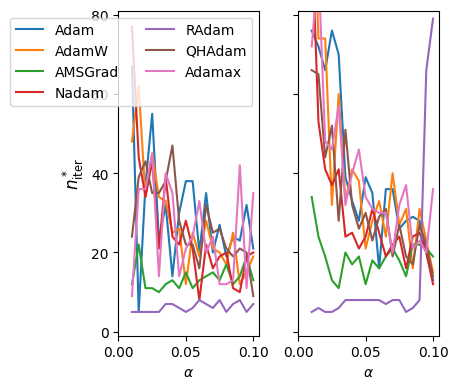

In [6]:

optimizers = [qml.AdamOptimizer, 
             optimizer_pennylane.AdamWOptimizer,
             optimizer_pennylane.AMSGradOptimizer,
             optimizer_pennylane.NadamOptimizer,
             optimizer_pennylane.RAdamOptimizer,
             optimizer_pennylane.QHAdamOptimizer,
             optimizer_pennylane.AdamaxOptimizer]


problems = [
    'VQE',
    'QAOA',
    'Dynamic simulation'
]
t = 0
step_sizes = np.linspace(0.01, 0.1, 19)
fig, ax = plt.subplots(1, 2, figsize=(4.5, 4))

# VQE
for j, optimizer in enumerate(optimizers):
    
    indices = []
    for i, stepsize in enumerate(step_sizes):
        # Load data
        loss = np.loadtxt(f'../data/loss/lossvqe_3qubit_2layer_{optimizer.__name__}_t{np.round(stepsize, 5)}.txt')
        for point in range(5, len(loss)):
            if np.var(loss[point-5:point]) < 0.0001:
                index = point
                break
        indices.append(index)
    ax[0].plot(step_sizes, indices, label = optimizer.__name__[:-9])

ax[0].set_ylim(-1, 81)
ax[0].set_yticks([0, 20, 40, 60, 80])
ax[0].set_yticklabels([0, 20, 40, 60, 80])
ax[0].set_ylabel(r"$n_{\text{iter}}^*$", fontsize = 12)
ax[0].set_xticks([0, 0.05, 0.1])
ax[0].set_xlabel(r"$\alpha$")

# QAOA

for j, optimizer in enumerate(optimizers):
    
    indices = []
    for i, stepsize in enumerate(step_sizes):
        # Load data
        loss = np.loadtxt(f'../data/loss/lossqaoa_4qubit_2layer_{optimizer.__name__}_t{np.round(stepsize, 5)}.txt')
        for point in range(5, len(loss)):
            if np.var(loss[point-5:point]) < 0.0001:
                index = point
                break
        indices.append(index)
    ax[1].plot(step_sizes, indices, label = optimizer.__name__[:-9])

ax[1].set_ylim(-1, 81)
ax[1].set_yticks([0, 20, 40, 60, 80])
ax[1].set_yticklabels([])
# ax[1].set_ylabel(r"$n_{\text{iter}}^*$", fontsize = 12)
ax[1].set_xticks([0, 0.05, 0.1])
ax[1].set_xlabel(r"$\alpha$")



ax[0].legend(ncol = 2)
# plt.legend(ncol = 5)
#plt.tight_layout()
plt.tight_layout()
#plt.savefig('../data/images/alpha.svg', bbox_inches='tight')
plt.show()

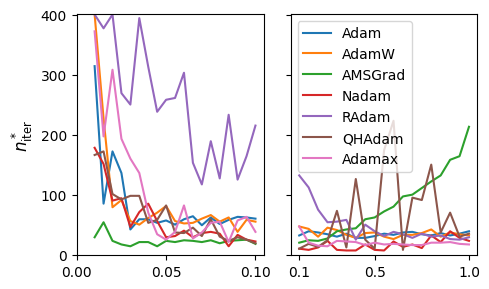

In [17]:

from qoop.core import optimizer_pennylane
import pennylane as qml
optimizers = [qml.AdamOptimizer, 
             optimizer_pennylane.AdamWOptimizer,
             optimizer_pennylane.AMSGradOptimizer,
             optimizer_pennylane.NadamOptimizer,
             optimizer_pennylane.RAdamOptimizer,
             optimizer_pennylane.QHAdamOptimizer,
             optimizer_pennylane.AdamaxOptimizer]


problems = [
    'VQE',
    'QAOA',
    'Dynamic simulation'
]
t = 0
step_sizes = np.linspace(0.01, 0.1, 19)
fig, ax = plt.subplots(1, 2, figsize=(5, 3))

# VQE
for j, optimizer in enumerate(optimizers):
    
    indices = []
    for i, stepsize in enumerate(step_sizes):
        # Load data
        loss = np.loadtxt(f'../data/loss/lossvqe_3qubit_2layer_{optimizer.__name__}_t{np.round(stepsize, 5)}.txt')
        index = np.where(loss < -1.116)[0]
        if len(index) > 0:
            index = index[0]
        else:
            index = 400
        indices.append(index)
    ax[0].plot(step_sizes, indices, label = optimizer.__name__[:-9])


ax[0].set_ylim(-1, 401)
ax[0].set_yticks([0, 100, 200, 300, 400])
ax[0].set_yticklabels([0, 100, 200, 300, 400])
ax[0].set_ylabel(r"$n_{\text{iter}}^*$", fontsize = 12)
ax[0].set_xticks([0, 0.05, 0.1])

# QAOA
step_sizes = np.linspace(0.1, 1, 19)
for j, optimizer in enumerate(optimizers):
    
    indices = []
    for i, stepsize in enumerate(step_sizes):
        # Load data
            
        loss = np.loadtxt(f'../data/loss/lossqaoa_4qubit_2layer_{optimizer.__name__}_t{np.round(stepsize, 5)}.txt')
        index = np.where(loss < -3.99)[0]
        if len(index) > 0:
            index = index[0]
        else:
            index = 400
        indices.append(index)
    ax[1].plot(step_sizes, indices, label = optimizer.__name__[:-9])


# Dynamic simulation
ax[1].set_ylim(-1, 401)
ax[1].set_yticks([0, 100, 200, 300, 400])
ax[1].set_yticklabels([])
ax[1].set_xticks([0.1, 0.5, 1])




ax[1].legend()
plt.legend()
plt.tight_layout()
plt.tight_layout()
plt.savefig('../data/images/min_iter_vqe_qaoa.pdf', bbox_inches='tight')
plt.show()